[15. 15.  5.  5.  5. 10.  5.  9.  5. 13. 13.  6. 12. 15. 14.  9. 10. 14.
 14. 14.  6.  5. 12.  7.  8. 11.  7.  9. 14. 15. 12.  9.  6. 12. 15. 10.
 13.  9. 15. 15. 11. 12. 10. 15. 12. 11.  8. 13. 12.  9. 11.  7. 13.  7.
 15. 10.  6. 13.  9. 12. 11.  6.  6. 14.  6. 13. 10.  5. 11.  7.  6.  5.
  7.  5.  9. 13.  7. 12. 13. 13. 15.  9.  6.  9. 11. 13. 10. 10.  6.  6.
  6. 13. 13.  8. 15. 15.  9. 13. 14.  5.]


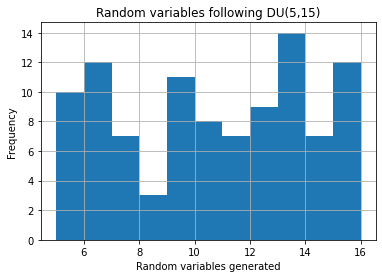

In [2]:
# * Method 1 * 

# 1) Generate uniform random numbers 
# 2) Generate discrete uniform distribution on
#    {a,...,b} using table lookup method 

# * Method 2 * 
# 1) Generate U~U(0,1)
# 2) X = ceil[a + (b-a+1)U]

### **THIS CODE FOLLOWS METHOD 2** 

## Combined generator - L'Ecuyer

import numpy as np 
import matplotlib.pyplot as plt
import math

n = 100
m1 = 2**32 - 209
m2 = 2**32 - 22853

x = np.zeros(n)
y = np.zeros(n)
U = np.zeros(n)   # Generated random numbers 

x[0] = 15
y[0] = 20

## need to choose numbers for x[1],x[2],y[1] & y[2]

x[1] = 8
y[1] = 15

x[2] = 25
y[2] = 5

for i in range(3,n):
    x[i] = (1403580*x[i-2] - 810728*x[i-3]) % m1
    y[i] = (527612*y[i-2] - 1370589*y[i-3]) % m2
    
for i in range(n):
    if x[i]<=y[i]:
        U[i] = (x[i]-y[i]+m1)/(m1+1)
    else:
        U[i] = (x[i]-y[i])/(m1+1)
        
## Generate random numbers following discrete uniform distribution        

a = 5 
b = 15
R = b-a+1
X = np.zeros(n)

for i in range(n):
    X[i] = math.floor(a+(R*U[i])) 
print(X)

## plotting a histogram 

plt.figure(1)
plt.hist(X,bins=range(a,b+2))
plt.xlabel("Random variables generated")
plt.ylabel("Frequency")
plt.title("Random variables following DU(5,15)")
plt.grid()
plt.show()
    
